# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

columns = [ "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value", "ocean_proximity", 'extra_1', 'extra_2', 'extra_3', 'extra_4']

In [29]:
df = pd.read_csv("/content/sample_data/housing_extra.csv", sep='\s+')
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [30]:
column_names = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
    "median_house_value", "ocean_proximity"
]


if df.shape[1] < len(column_names):
    raise ValueError(f"Dataset has fewer columns ({df.shape[1]}) than expected ({len(column_names)}).")
elif df.shape[1] > len(column_names):
    print(f"Dataset has more columns ({df.shape[1]}) than expected ({len(column_names)}). Extra columns will be ignored.")

# Create a new dataset with the correct column names
df_cleaned=df.iloc[:, :len(column_names)]  # Select only the relevant columns
df_cleaned.columns = column_names

# Display information about the cleaned dataset
print("\nFirst Few Rows of the Dataset:")
print(df_cleaned.head())  # Show first 5 rows


Dataset has more columns (14) than expected (10). Extra columns will be ignored.

First Few Rows of the Dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    0.02731       0.0                7.07            0           0.469   
1    0.02729       0.0                7.07            0           0.469   
2    0.03237       0.0                2.18            0           0.458   
3    0.06905       0.0                2.18            0           0.458   
4    0.02985       0.0                2.18            0           0.458   

   population  households  median_income  median_house_value  ocean_proximity  
0       6.421        78.9         4.9671                   2            242.0  
1       7.185        61.1         4.9671                   2            242.0  
2       6.998        45.8         6.0622                   3            222.0  
3       7.147        54.2         6.0622                   3            222.0  
4       6.430        58.7         6.

In [31]:
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0


In [32]:
df_cleaned.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,int64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,int64
ocean_proximity,float64


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

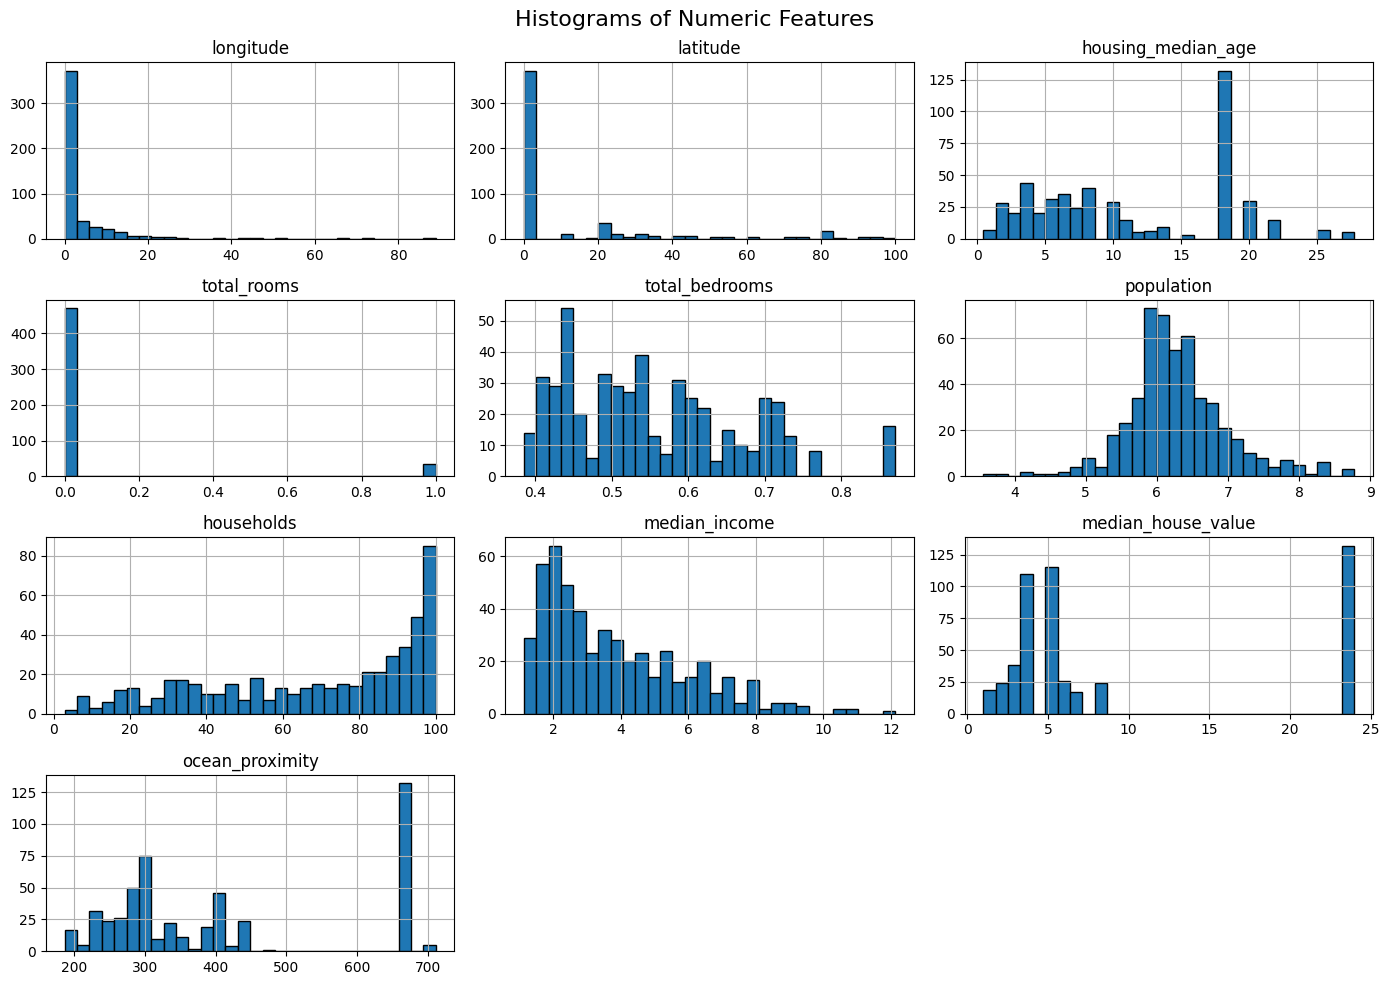

In [33]:
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numeric features
df_cleaned[numeric_columns].hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you.

In [34]:
df_cleaned.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [35]:

import numpy as np

# Create new columns based on arithmetic operations
df_cleaned["rooms_per_household"] = df_cleaned["total_rooms"] / df_cleaned["households"]
df_cleaned["population_per_household"] =df_cleaned["population"] / df_cleaned["households"]

# Calculate bedrooms_per_room, handling cases where total_rooms is 0
df_cleaned["bedrooms_per_room"] = np.where(
    df_cleaned["total_rooms"] == 0,
    0,  # If total_rooms is 0, set bedrooms_per_room to 0
    df_cleaned["total_bedrooms"] / df_cleaned["total_rooms"]  # Otherwise, calculate the ratio
)


print("Dataset with New Columns:")
print(df_cleaned[["rooms_per_household", "population_per_household", "bedrooms_per_room"]].head())


Dataset with New Columns:
   rooms_per_household  population_per_household  bedrooms_per_room
0                  0.0                  0.081381                0.0
1                  0.0                  0.117594                0.0
2                  0.0                  0.152795                0.0
3                  0.0                  0.131863                0.0
4                  0.0                  0.109540                0.0


In [36]:
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,0.0,0.081381,0.0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,0.0,0.117594,0.0
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,0.0,0.152795,0.0
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,0.0,0.131863,0.0
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,0.0,0.109540,0.0


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [37]:
if "rooms_per_household" not in df_cleaned.columns:
    df_cleaned["rooms_per_household"] =df_cleaned["total_rooms"] / df_cleaned["households"]

largest_values =df_cleaned["rooms_per_household"].nlargest(2)
smallest_values = df_cleaned["rooms_per_household"].nsmallest(2)
print("largset value")
print(largest_values)
print("sallest value")
print(smallest_values)
outlier_indices = largest_values.index.tolist() + smallest_values.index.tolist()
df_cleaned = df_cleaned.drop(index=outlier_indices)

df_cleaned["rooms_per_household"].describe()

largset value
282    0.040323
276    0.036232
Name: rooms_per_household, dtype: float64
sallest value
0    0.0
1    0.0
Name: rooms_per_household, dtype: float64


,rooms_per_household
count,501.000000
mean,0.000879
std,0.003501
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.030395


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

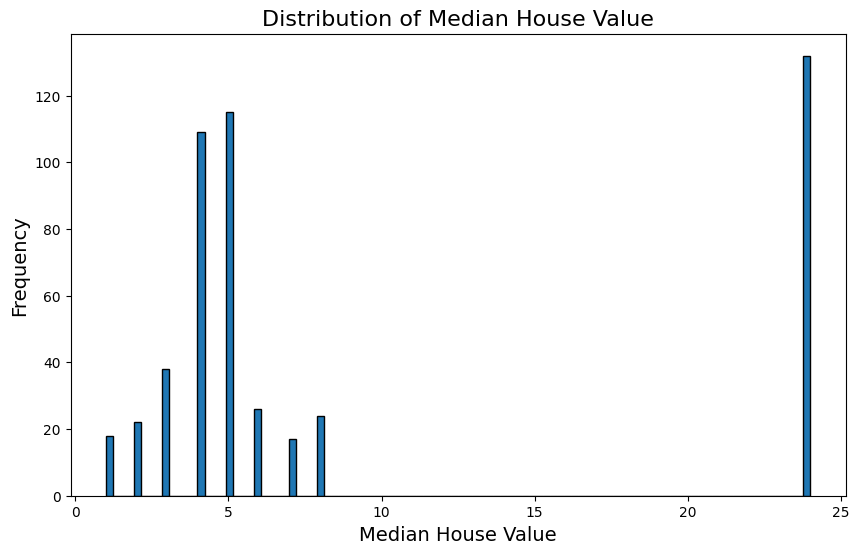

In [38]:
df_cleaned["median_house_value"].hist(bins=100, figsize=(10, 6), edgecolor="black")
plt.title("Distribution of Median House Value", fontsize=16)
plt.xlabel("Median House Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(False)
plt.show()

2. Check out what variables correlates the most with "median house value"

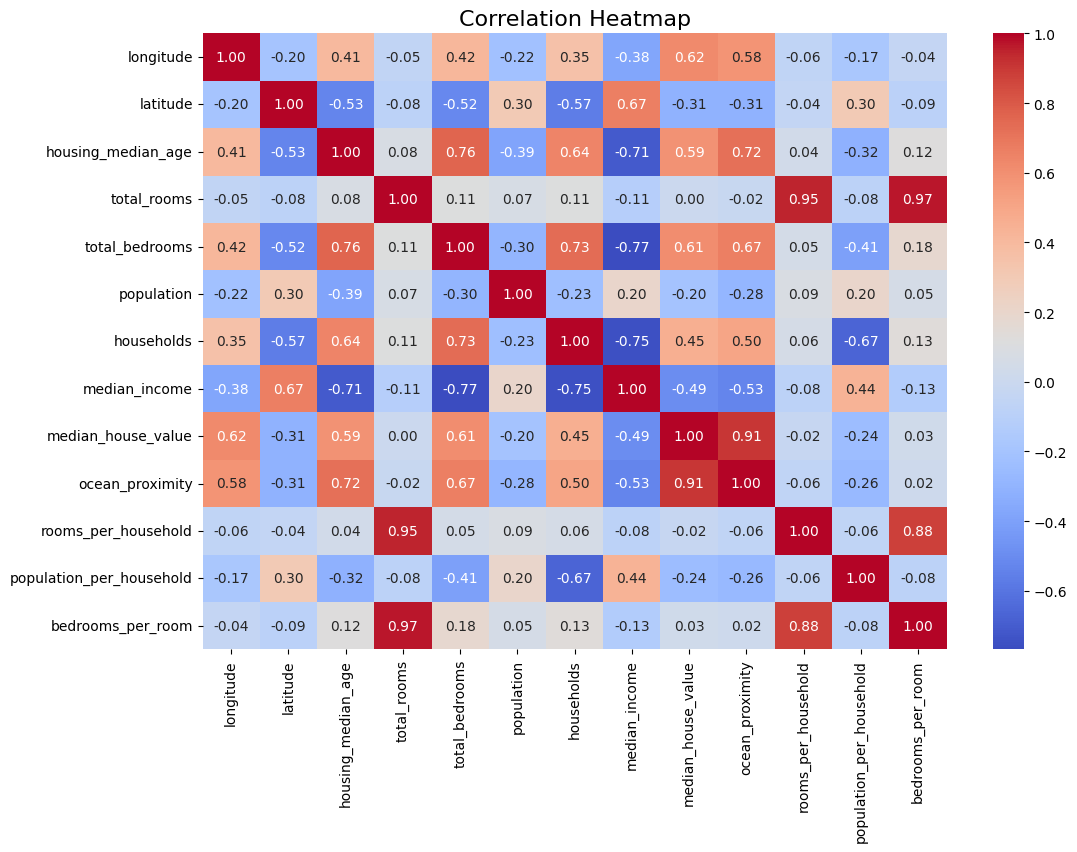

In [41]:
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

In [42]:
top_correlations = correlation_matrix["median_house_value"].sort_values(ascending=False)
print("Top Correlations with Median House Value:")
print(top_correlations)

Top Correlations with Median House Value:
median_house_value          1.000000
ocean_proximity             0.909724
longitude                   0.624831
total_bedrooms              0.609414
housing_median_age          0.592015
households                  0.454947
bedrooms_per_room           0.028436
total_rooms                 0.003126
rooms_per_household        -0.023570
population                 -0.203296
population_per_household   -0.243765
latitude                   -0.310235
median_income              -0.492604
Name: median_house_value, dtype: float64


4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

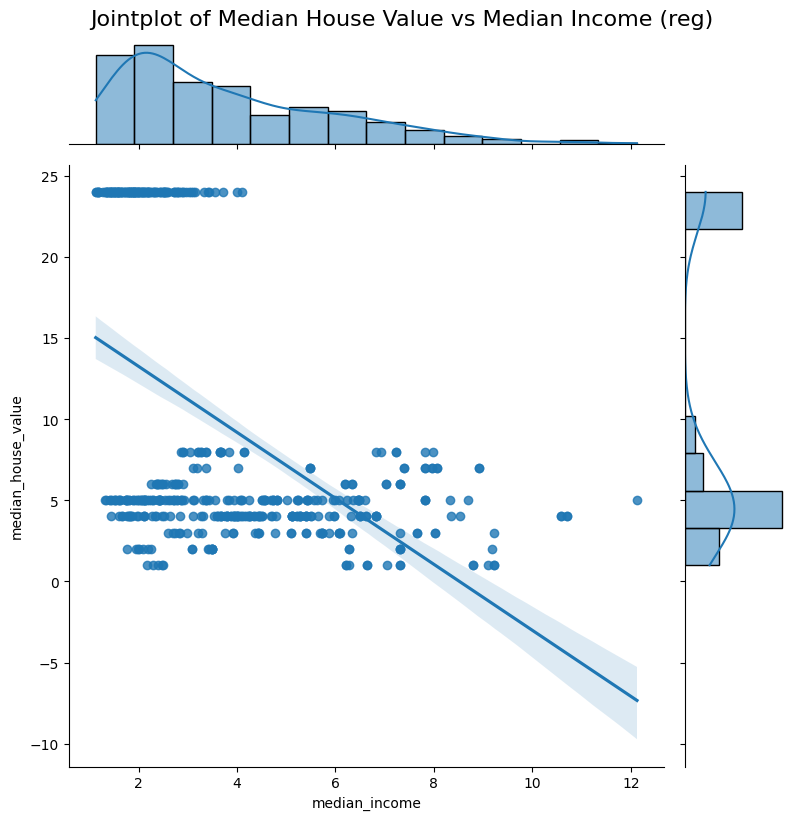

In [47]:
sns.jointplot(
    data=df_cleaned,
    x="median_income",
    y="median_house_value",
    kind="reg",
    height=8
)

# Display the plot
plt.suptitle("Jointplot of Median House Value vs Median Income (reg)", y=1.02, fontsize=16)
plt.show()


5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

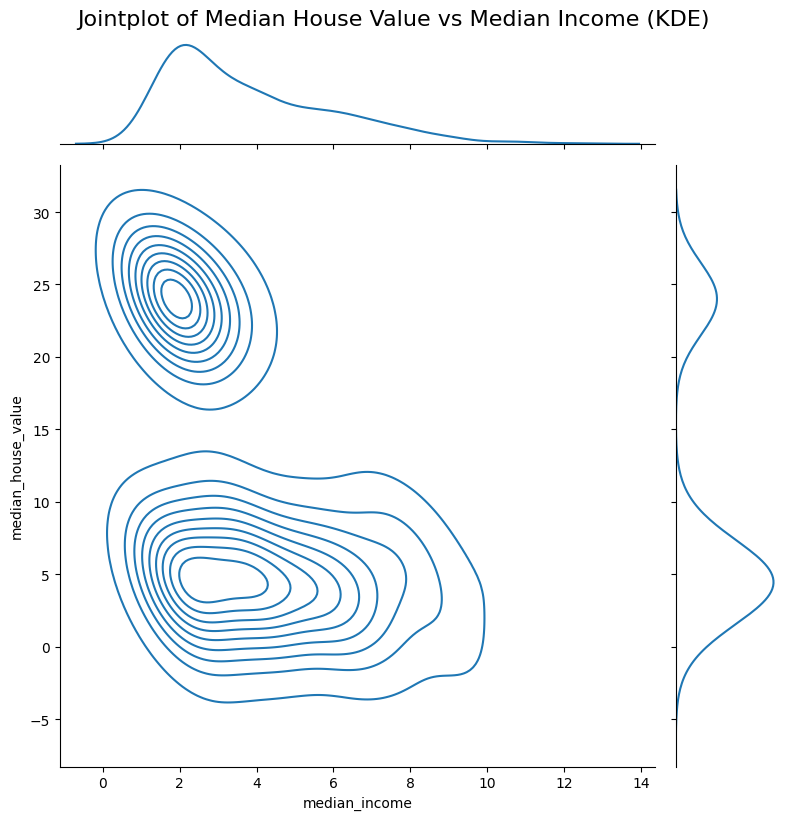

In [48]:
sns.jointplot(
    data=df_cleaned,
    x="median_income",
    y="median_house_value",
    kind="kde",
    height=8
)

# Display the plot
plt.suptitle("Jointplot of Median House Value vs Median Income (KDE)", y=1.02, fontsize=16)
plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [49]:
df_cleaned["income_cat"] = pd.qcut(
    df_cleaned["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very High"]
)

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

Text(0.5, 1.0, 'Count of Income Categories by Ocean Proximity')

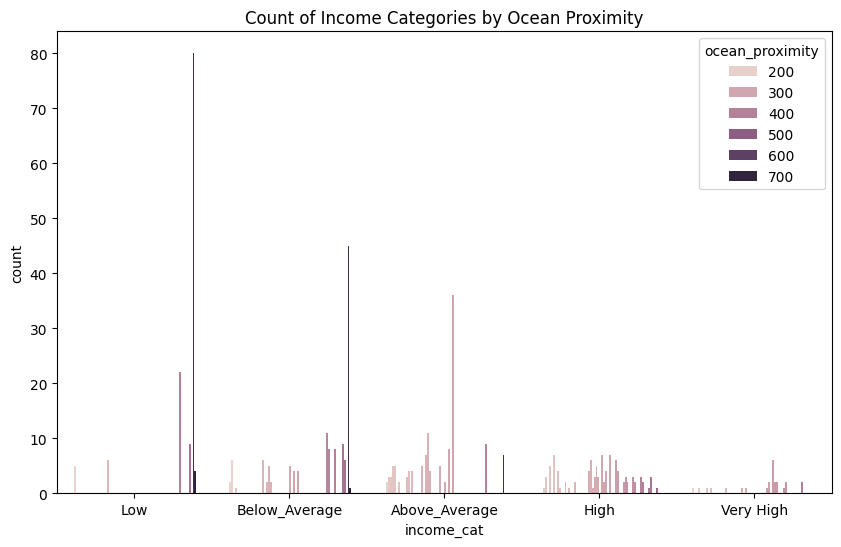

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x="income_cat", hue="ocean_proximity")
plt.title("Count of Income Categories by Ocean Proximity")

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

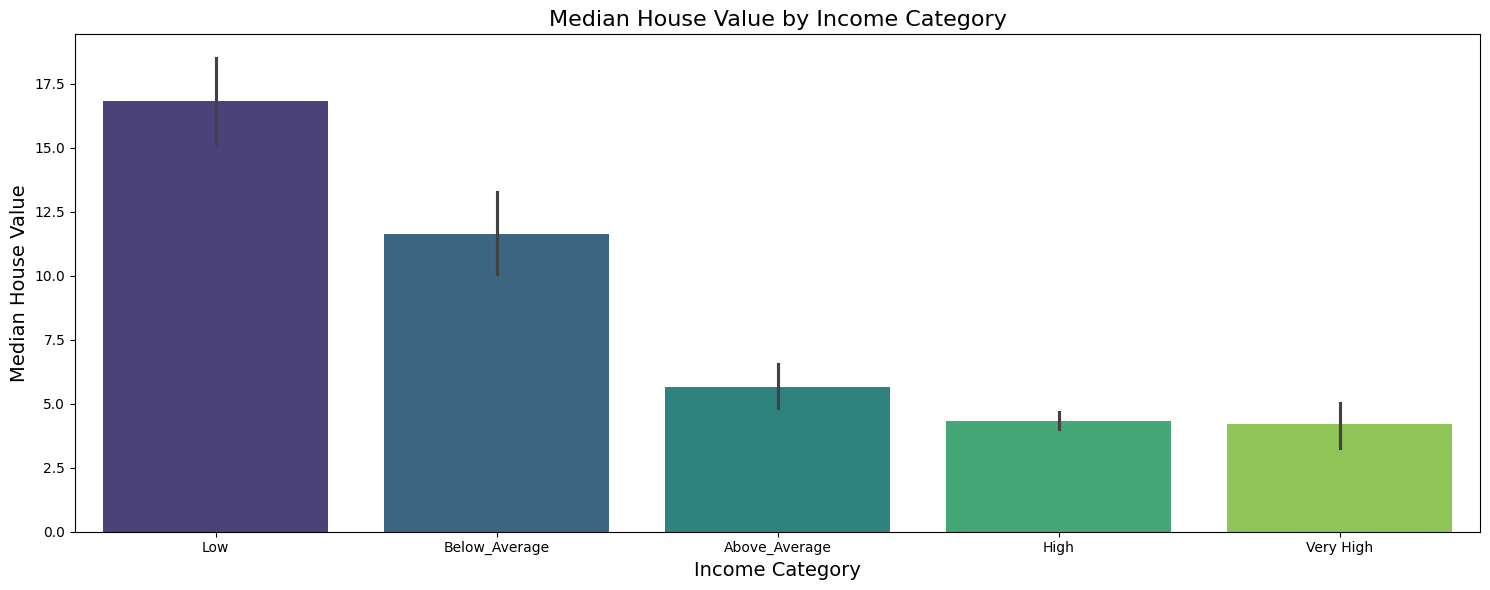

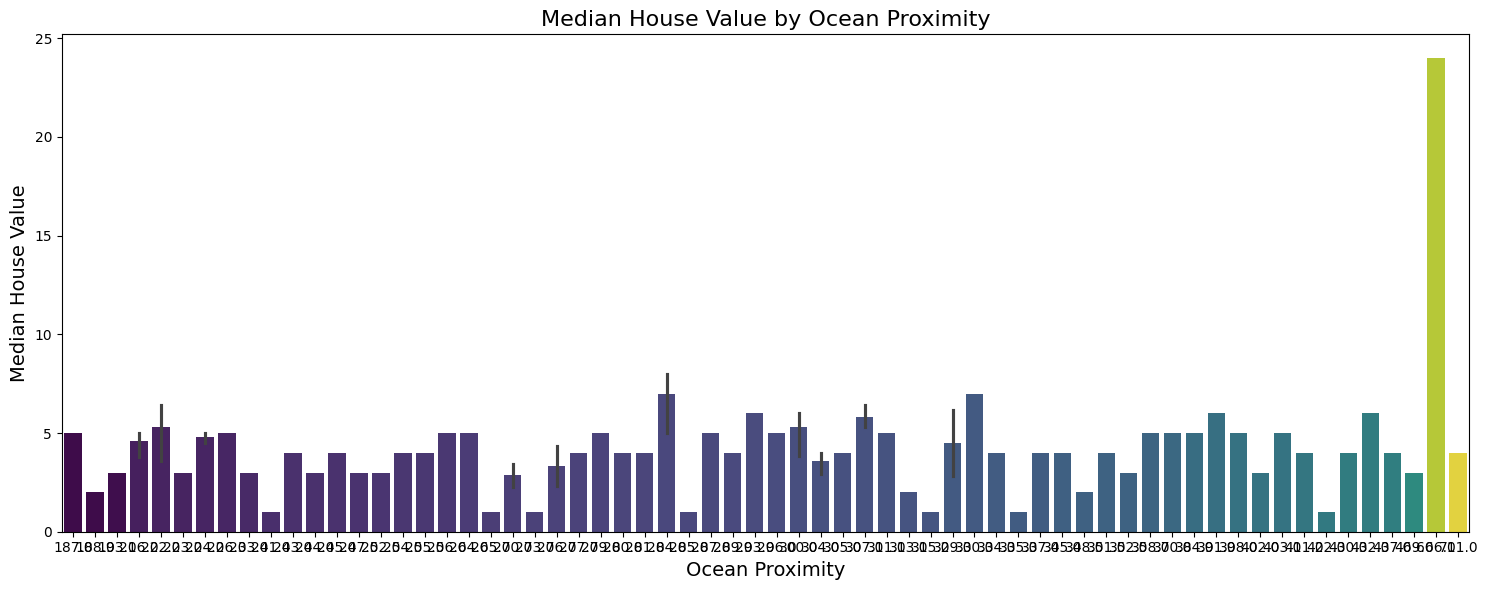

In [57]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=df_cleaned,
    x="income_cat",
    y="median_house_value",
    hue="income_cat",  # Set hue to the same as x for consistent coloring
    dodge=False,  # Disable dodge to align bars
    palette="viridis"
)
plt.title("Median House Value by Income Category", fontsize=16)
plt.xlabel("Income Category", fontsize=14)
plt.ylabel("Median House Value", fontsize=14)
plt.legend([], [], frameon=False)  # Disable legend
plt.tight_layout()
plt.show()

print()

# Barplot 2: Median house value by ocean proximity
plt.figure(figsize=(15, 6))
sns.barplot(
    data=df_cleaned,
    x="ocean_proximity",
    y="median_house_value",
    hue="ocean_proximity",  # Set hue to x for consistent coloring
    dodge=False,
    palette="viridis"
)
plt.title("Median House Value by Ocean Proximity", fontsize=16)
plt.xlabel("Ocean Proximity", fontsize=14)
plt.ylabel("Median House Value", fontsize=14)
plt.legend([], [], frameon=False)  # Disable legend
plt.tight_layout()
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [58]:
pivot_table = df_cleaned.pivot_table(
    index="income_cat",
    columns="ocean_proximity",
    values="median_house_value",
    aggfunc="mean",
    observed=False
)


if "ISLAND" in pivot_table.columns:
    pivot_table = pivot_table.drop(columns=["ISLAND"])


print("Pivoted DataFrame (Mean Median House Value):")
print(pivot_table)

Pivoted DataFrame (Mean Median House Value):
ocean_proximity  187.0  188.0  193.0  216.0  222.0  223.0  224.0  226.0  \
income_cat                                                                
Low                NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN   
Below_Average      NaN    2.0    3.0    NaN    7.0    NaN    NaN    NaN   
Above_Average      NaN    NaN    3.0    5.0    7.0    3.0    4.6    NaN   
High               NaN    NaN    NaN    5.0    3.0    NaN    5.0    NaN   
Very High          5.0    NaN    NaN    3.0    NaN    NaN    NaN    5.0   

ocean_proximity  233.0  241.0  ...  402.0  403.0  411.0  422.0  430.0  432.0  \
income_cat                     ...                                             
Low                NaN    NaN  ...    NaN    5.0    NaN    NaN    NaN    NaN   
Below_Average      NaN    NaN  ...    NaN    5.0    NaN    NaN    NaN    6.0   
Above_Average      3.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
High               3.0    NaN

5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

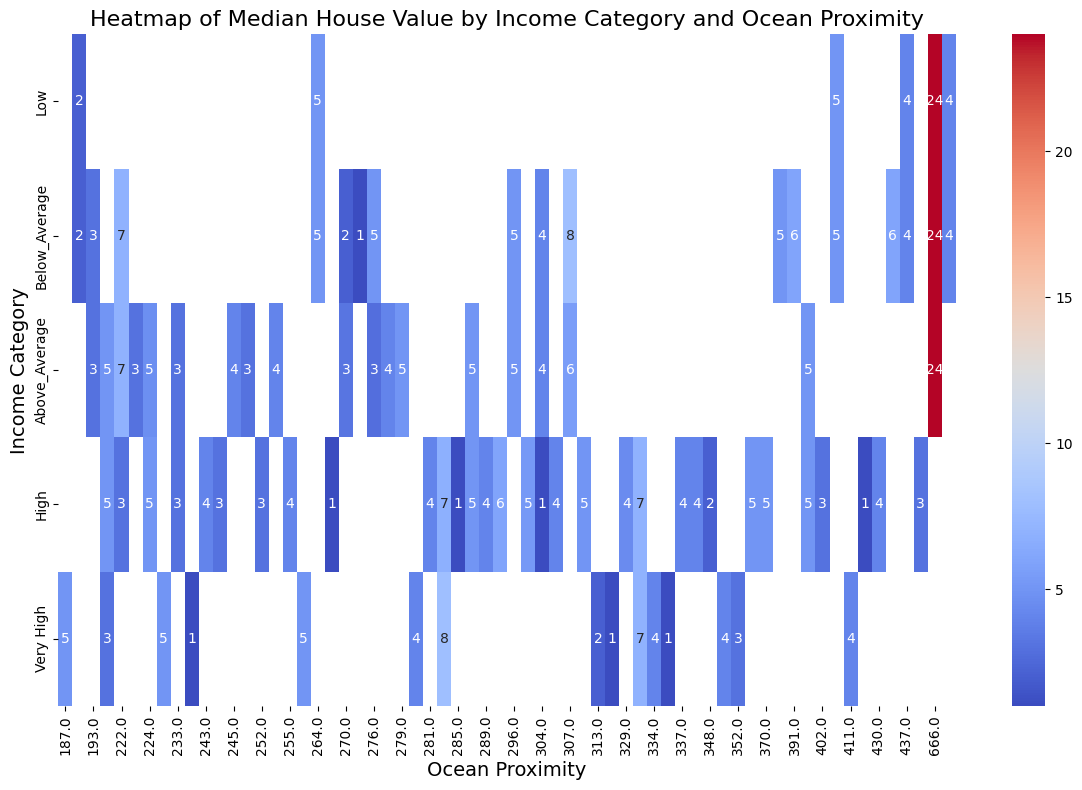

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    cbar=True
)


plt.title("Heatmap of Median House Value by Income Category and Ocean Proximity", fontsize=16)
plt.xlabel("Ocean Proximity", fontsize=14)
plt.ylabel("Income Category", fontsize=14)
plt.tight_layout()
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [63]:
#df_cleaned = df_cleaned.drop(columns=["income_cat"])
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,0.0,0.152795,0.0
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,0.0,0.131863,0.0
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,0.0,0.109540,0.0
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,0.0,0.090270,0.0
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,0.0,0.064225,0.0


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`.

In [64]:
import scipy.stats as stats

from scipy.stats import zscore

In [65]:
float_columns = df_cleaned.select_dtypes(include=['float64']).columns

z_scored = df_cleaned[float_columns].apply(zscore, nan_policy='omit')

print("Z-Scored Data:")
print(z_scored.head())

Z-Scored Data:
   longitude  latitude  housing_median_age  total_bedrooms  population  \
2  -0.419195 -0.484029           -1.316057       -0.842005    1.029306   
3  -0.414944 -0.484029           -1.316057       -0.842005    1.242208   
4  -0.419487 -0.484029           -1.316057       -0.842005    0.217710   
5  -0.412714  0.057069           -0.485850       -0.272571   -0.379557   
6  -0.406194  0.057069           -0.485850       -0.272571   -0.150938   

   households  median_income  ocean_proximity  rooms_per_household  \
2   -0.815766       1.079901        -1.115528            -0.251415   
3   -0.517121       1.079901        -1.115528            -0.251415   
4   -0.357133       1.079901        -1.115528            -0.251415   
5   -0.076265       0.842143        -0.587017            -0.251415   
6    0.972546       1.026966        -0.587017            -0.251415   

   population_per_household  bedrooms_per_room  
2                  0.076486          -0.258176  
3                 -0.

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [66]:
df_encoded = pd.get_dummies(
    df_cleaned,
    columns=["ocean_proximity"],
    drop_first=True
)

4. Save our predicting variable to `y`.

In [67]:
y = df_encoded["median_house_value"]

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [68]:


if not isinstance(df_encoded, pd.DataFrame):
    df_encoded = pd.DataFrame(df_encoded, columns=["df_encoded"], index=housing_data_encoded.index)
X = pd.concat([z_scored, df_encoded.drop(columns=["median_house_value"])], axis=1)


print("Feature Matrix (X):")
print(X.head())

Feature Matrix (X):
   longitude  latitude  housing_median_age  total_bedrooms  population  \
2  -0.419195 -0.484029           -1.316057       -0.842005    1.029306   
3  -0.414944 -0.484029           -1.316057       -0.842005    1.242208   
4  -0.419487 -0.484029           -1.316057       -0.842005    0.217710   
5  -0.412714  0.057069           -0.485850       -0.272571   -0.379557   
6  -0.406194  0.057069           -0.485850       -0.272571   -0.150938   

   households  median_income  ocean_proximity  rooms_per_household  \
2   -0.815766       1.079901        -1.115528            -0.251415   
3   -0.517121       1.079901        -1.115528            -0.251415   
4   -0.357133       1.079901        -1.115528            -0.251415   
5   -0.076265       0.842143        -0.587017            -0.251415   
6    0.972546       1.026966        -0.587017            -0.251415   

   population_per_household  ...  ocean_proximity_402.0  \
2                  0.076486  ...                  False

# Part 4 - Machine Learning




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 85), (101, 85), (400,), (101,))

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model.

In [71]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression()

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look?

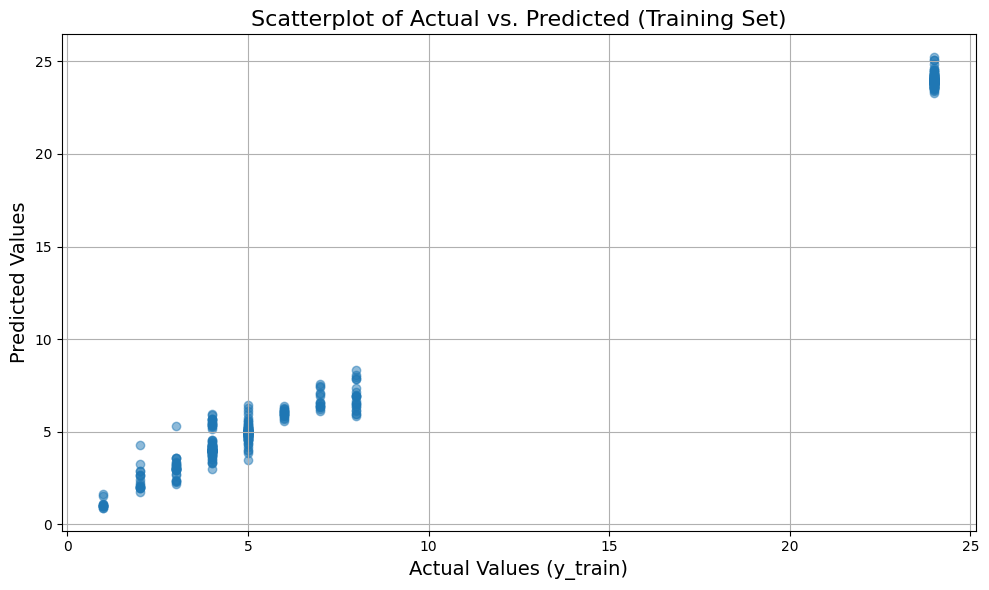

In [74]:
y_train_predictions = model_linear.predict(x_train)

# Create a scatterplot to visualize y_train vs. predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_predictions, alpha=0.5)
plt.title("Scatterplot of Actual vs. Predicted (Training Set)", fontsize=16)
plt.xlabel("Actual Values (y_train)", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [85]:
from sklearn.metrics import r2_score as r2_score_func
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)


y_train_predictions = model.predict(x_train)


mse = mean_squared_error(y_train, y_train_predictions)

r2 = r2_score_func(y_train, y_train_predictions)


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 0.35
R^2 Score: 1.00


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

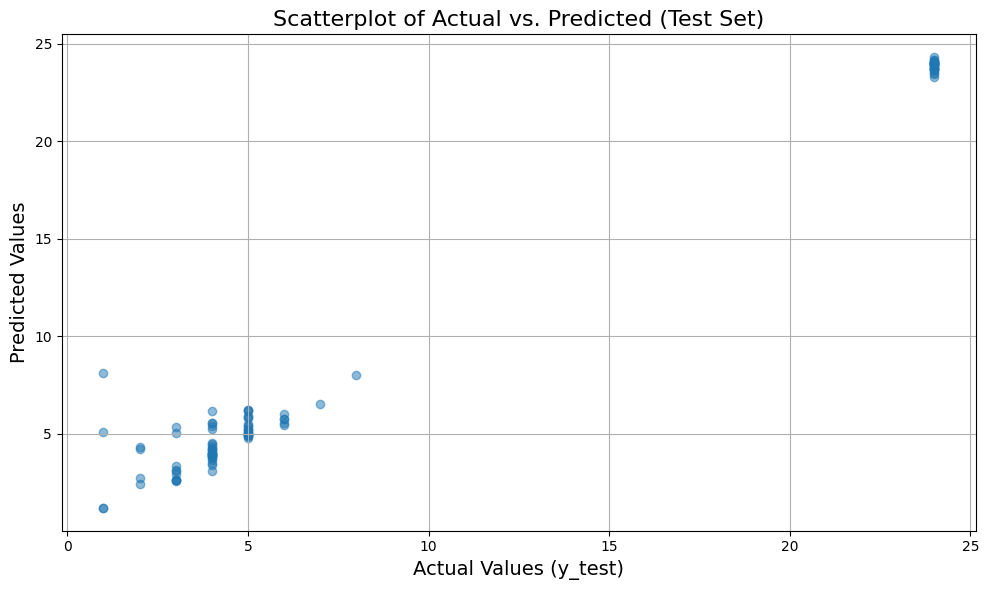

In [86]:
model = LinearRegression()
model.fit(x_train, y_train)

y_test_predictions = model.predict(x_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predictions, alpha=0.5)
plt.title("Scatterplot of Actual vs. Predicted (Test Set)", fontsize=16)
plt.xlabel("Actual Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [88]:
mse_test = mean_squared_error(y_test, y_test_predictions)
r2_test = r2_score_func(y_test, y_test_predictions)


print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"R^2 Score on Test Set: {r2_test:.2f}")

Mean Squared Error (MSE) on Test Set: 1.14
R^2 Score on Test Set: 0.99


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [89]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_test_predictions)

print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.2f}")

Root Mean Squared Error (RMSE) on Test Set: 1.07


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [90]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predictions))


print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test:.2f}")

Root Mean Squared Error (RMSE) on Test Set: 1.07


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [91]:
results_df = pd.DataFrame({
    "Actual Values": y_test,
    "Predicted Values": y_test_predictions
})

# Display the first few rows of the DataFrame
print("Comparison of Actual vs. Predicted Values:")
print(results_df.head())

Comparison of Actual vs. Predicted Values:
     Actual Values  Predicted Values
366             24         23.532447
75               5          6.163219
379             24         24.201874
157              5          4.978345
106              5          5.206006


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.